In [1]:
import pandas as pd
dataset = pd.read_csv("dataset.csv").set_index("Unnamed: 0")

In [2]:
dataset.head()

,Utterance,Dialog_Act,cleaned_utterance
Unnamed: 0,,,
0,Okay. /,o,okay
1,"{D So, }",qw,d so
2,"[ [ I guess, +",qy^d,i guess
3,Does it say something? /,qy,does it say something
4,I think it usually does. /,sd,i think it usually does


In [3]:
dataset["Dialog_Act"].count()

190909

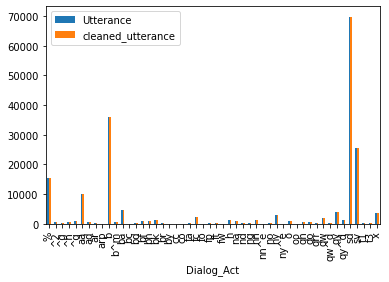

In [4]:
plot = dataset.groupby("Dialog_Act").count().plot.bar()

In [ ]:
plot.get_figure().savefig("utterance_cleaned.png",dpi=300,pad_inches=0,bbox_inches='tight')

In [5]:
import regex as re
cleaned_utterance = []
# count = 0
for _,v in dataset.iterrows():
    cleaned = v["Utterance"].lower()
    cleaned = re.sub('[^a-zA-Z]', ' ', cleaned)
    cleaned = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", cleaned)
    cleaned = re.sub("(\\d|\\W)+", " ", cleaned)
#     print(v["Utterance"] , "------->", cleaned)
    cleaned_utterance.append(cleaned)
dataset["cleaned_utterance"] = cleaned_utterance
dataset.to_csv("dataset.csv")

In [6]:
import pandas as pd
dataset = pd.read_csv("dataset.csv").set_index("Unnamed: 0")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [7]:
bow_CV = CountVectorizer()
tfidf_CV = TfidfVectorizer()
bags_of_words = bow_CV.fit_transform(dataset["cleaned_utterance"])
tfidf = tfidf_CV.fit_transform(dataset["cleaned_utterance"])

In [8]:
X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW = train_test_split(bags_of_words, dataset["Dialog_Act"], test_size = 0.2, random_state = 42, shuffle = True)

In [9]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, dataset["Dialog_Act"], test_size = 0.2, random_state = 42, shuffle = True)

In [ ]:
from sklearn import svm
svc_BOW = svm.SVC(kernel='linear')
svc_tfidf = svm.SVC(kernel='linear')

In [ ]:
svc_BOW.fit(X_train_BOW, y_train_BOW)


KeyboardInterrupt: ignored

In [ ]:
predictions_BOW = svc_BOW.predict(X_test_BOW)
# predictions_tfidf = classifier.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test_BOW, predictions_BOW))

In [ ]:
svc_tfidf.fit(X_train_tfidf, y_train_tfidf)

NameError: ignored

In [ ]:
predictions_tfidf = svc_tfidf.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, predictions_tfidf))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           %       0.60      0.61      0.61      2599
          ^2       0.00      0.00      0.00       113
          ^g       0.00      0.00      0.00        18
          ^h       0.83      0.49      0.61       119
          ^q       0.00      0.00      0.00       161
          aa       0.55      0.31      0.40      1848
          ad       0.61      0.17      0.26       115
          ar       0.00      0.00      0.00        55
         arp       0.00      0.00      0.00         8
           b       0.76      0.92      0.83      6196
         b^m       0.00      0.00      0.00       115
          ba       0.79      0.67      0.73       797
          bc       0.00      0.00      0.00         4
          bd       0.00      0.00      0.00        17
          bf       0.00      0.00      0.00       155
          bh       0.49      0.61      0.54       197
          bk       0.31      0.62      0.41       231
          br       0.31    

In [ ]:
import joblib
# joblib.dump(svc_BOW,"svc_BOW.pkl")
joblib.dump(svc_tfidf,"svc_tfidf.pkl")

['svc_tfidf.pkl']

In [ ]:
from google.colab import files
# files.download('svc_BOW.pkl')
files.download('svc_tfidf.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_BOW = RandomForestClassifier(max_depth=20)
rf_BOW.fit(X_train_BOW, y_train_BOW)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions_BOW = rf_BOW.predict(X_test_BOW)

In [ ]:
print(classification_report(y_test_BOW, predictions_BOW))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           %       0.00      0.00      0.00      2599
          ^2       0.00      0.00      0.00       113
          ^g       0.00      0.00      0.00        18
          ^h       0.00      0.00      0.00       119
          ^q       0.00      0.00      0.00       161
          aa       0.00      0.00      0.00      1848
          ad       0.00      0.00      0.00       115
          ar       0.00      0.00      0.00        55
         arp       0.00      0.00      0.00         8
           b       0.76      0.87      0.81      6196
         b^m       0.00      0.00      0.00       115
          ba       0.00      0.00      0.00       797
          bc       0.00      0.00      0.00         4
          bd       0.00      0.00      0.00        17
          bf       0.00      0.00      0.00       155
          bh       0.00      0.00      0.00       197
          bk       0.00      0.00      0.00       231
          br       0.00    

In [ ]:
joblib.dump(rf_BOW,"rf_BOW.pkl")
files.download('rf_BOW.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rf_tfidf = RandomForestClassifier(max_depth=20)
rf_tfidf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions_tfidf = rf_tfidf.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, predictions_tfidf))
joblib.dump(rf_tfidf,"rf_tfidf.pkl")
files.download('rf_tfidf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           %       0.00      0.00      0.00      2599
          ^2       0.00      0.00      0.00       113
          ^g       0.00      0.00      0.00        18
          ^h       0.00      0.00      0.00       119
          ^q       0.00      0.00      0.00       161
          aa       0.00      0.00      0.00      1848
          ad       0.00      0.00      0.00       115
          ar       0.00      0.00      0.00        55
         arp       0.00      0.00      0.00         8
           b       0.76      0.88      0.81      6196
         b^m       0.00      0.00      0.00       115
          ba       0.00      0.00      0.00       797
          bc       0.00      0.00      0.00         4
          bd       0.00      0.00      0.00        17
          bf       0.00      0.00      0.00       155
          bh       0.00      0.00      0.00       197
          bk       0.00      0.00      0.00       231
          br       0.00    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
query = tfidf_CV.transform(["Congratulations!"])
print(query.shape)

(1, 17880)


In [ ]:
svc_tfidf.predict(query)

array(['ba'], dtype=object)

In [22]:
len(set(y_train_tfidf))

50

In [24]:
from sklearn.neural_network import MLPClassifier
hl_sizes = [40000, 5000, 650, 50]
nn_BOW = MLPClassifier(hidden_layer_sizes=hl_sizes, verbose=True)
nn_tfidf = MLPClassifier(hidden_layer_sizes=hl_sizes, verbose=True)